In [ ]:
# Move kaggle.json to the correct directory and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API key setup complete. You can now try running the data download cell again.")

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Kaggle API key setup complete. You can now try running the data download cell again.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

print("Path to dataset files:", path)

100%|██████████| 0.98M/0.98M [00:00<00:00, 86.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/default-of-credit-card-clients-dataset/versions/1


# Task
Perform an exploratory data analysis (EDA) on the "default of credit card clients.csv" file, which is located in the directory "/root/.cache/kagglehub/datasets/uciml/default-of-credit-card-clients-dataset/versions/1".

## Load Dataset

### Subtask:
Load the 'default of credit card clients.csv' file from the downloaded path into a pandas DataFrame, skipping the first row and renaming columns.


**Reasoning**:
The previous code block failed to load the dataset using the Kaggle API directly, and the `kaggle.json` was not found. However, `kagglehub` successfully downloaded and extracted the dataset into the `path` variable. Now, I need to load the specified CSV file from this `path` into a pandas DataFrame, following the instructions to skip the first row, rename a specific column, clean other column names, and drop the 'ID' column.



# Task
Perform an exploratory data analysis (EDA) on the "default of credit card clients.csv" file located at "/root/.cache/kagglehub/datasets/uciml/default-of-credit-card-clients-dataset/versions/1/default of credit card clients.csv", including an initial data overview, checking for missing values, analyzing the distribution of the target variable 'DEFAULT', analyzing numerical and categorical feature distributions, and computing a correlation matrix, followed by a summary of key insights.

## Initial Data Overview

### Subtask:
Display the first few rows of the DataFrame, check data types, non-null values, and generate summary statistics to get a basic understanding of the data.


**Reasoning**:
The subtask requires loading the specified CSV file, performing column renaming and cleaning as described, and then displaying the first few rows, data types, non-null values, and summary statistics. All these operations are part of the initial data overview and can be efficiently performed in a single code block.



**Reasoning**:
The previous attempt to load the CSV file failed due to a `FileNotFoundError`. The subtask explicitly instructs to load the data from a specific path and file name (which was incorrect in the previous attempt) and to skip the first row. The user's notebook context shows that the file that was successfully downloaded is `UCI_Credit_Card.csv` located in the `path` variable. This step corrects the file path to use the `UCI_Credit_Card.csv` file while adhering to all other instructions, including skipping the first row and performing column renaming and overview.



In [12]:
import pandas as pd
import os

# Use the 'path' variable from the kernel state and the selected file name
# The actual file found by kagglehub was 'UCI_Credit_Card.csv'
data_file_path = os.path.join(path, 'UCI_Credit_Card.csv')

print(f"Loading '{os.path.basename(data_file_path)}' into a pandas DataFrame...")

try:
    # 1. Load the CSV file, skipping the first row as explicitly instructed.
    #    This might affect column names, which will be handled in the next steps.
    df = pd.read_csv(data_file_path, skiprows=[0])

    # 2. Rename the column 'default payment next month' to 'DEFAULT'
    # 3. Strip any leading or trailing whitespace from all other column names.
    #    Note: With skiprows=[0], the actual header might be skipped,
    #    and pandas might infer headers or use the second row as header.
    #    This might cause KeyError for 'default payment next month'.
    #    This potential issue will be addressed if it occurs.
    original_columns = df.columns.tolist()
    new_columns = []
    for col in original_columns:
        if col == 'default payment next month':
            new_columns.append('DEFAULT')
        else:
            new_columns.append(col.strip())
    df.columns = new_columns

    # 4. Drop the 'ID' column from the DataFrame if it exists
    if 'ID' in df.columns:
        df = df.drop(columns=['ID'])
        print("Dropped 'ID' column.")
    else:
        print("No 'ID' column found to drop (possibly due to skiprows or different file structure).")


    print("Dataset loaded and initial cleaning applied successfully (if columns existed)!")

    # 5. Display the first 5 rows of the df DataFrame
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

    # 6. Get a concise summary of the DataFrame, including data types and non-null values
    print("\nDataFrame Info (data types and non-null values):")
    df.info()

    # 7. Generate descriptive statistics for the numerical columns
    print("\nDescriptive statistics for numerical columns:")
    print(df.describe())

except Exception as e:
    print(f"An error occurred during loading or initial processing: {e}")
    df = None # Ensure df is None if an error occurs


Loading 'UCI_Credit_Card.csv' into a pandas DataFrame...
No 'ID' column found to drop (possibly due to skiprows or different file structure).
Dataset loaded and initial cleaning applied successfully (if columns existed)!

First 5 rows of the DataFrame:
   1     20000  2  2.1  1.1  24  2.2  2.3  -1  -1.1  ...        0      0.1  \
0  2  120000.0  2    2    2  26   -1    2   0     0  ...   3272.0   3455.0   
1  3   90000.0  2    2    2  34    0    0   0     0  ...  14331.0  14948.0   
2  4   50000.0  2    2    1  37    0    0   0     0  ...  28314.0  28959.0   
3  5   50000.0  1    2    1  57   -1    0  -1     0  ...  20940.0  19146.0   
4  6   50000.0  1    1    2  37    0    0   0     0  ...  19394.0  19619.0   

       0.2     0.3    689.1      0.4     0.5     0.6     0.7  1.2  
0   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0    1  
1  15549.0  1518.0   1500.0   1000.0  1000.0  1000.0  5000.0    0  
2  29547.0  2000.0   2019.0   1200.0  1100.0  1069.0  1000.0    0  
3  191

**Reasoning**:
The previous code block correctly loaded the `UCI_Credit_Card.csv` file but failed to properly identify and rename columns because `skiprows=[0]` caused the actual header to be skipped. The dataframe now has generic numerical column names instead of the descriptive ones. To correctly rename 'default payment next month' to 'DEFAULT' and drop 'ID', the data needs to be reloaded without skipping the first row so that the correct header is read. After reloading, the same cleaning steps (column renaming, stripping whitespace, and dropping 'ID') will be applied, followed by displaying the first few rows, data types, and summary statistics to ensure the data is loaded and cleaned as intended by the subtask.



In [ ]:
import pandas as pd
import os

# The file path is correct, but the issue was with skipping the header row.
data_file_path = os.path.join(path, 'UCI_Credit_Card.csv')

print(f"Reloading '{os.path.basename(data_file_path)}' to correctly capture header and rename target column...")

try:
    # 1. Load the CSV file WITHOUT skipping the first row to get correct headers
    df = pd.read_csv(data_file_path)

    # 2. Rename the column 'default.payment.next.month' to 'DEFAULT'
    #    Corrected column name based on previous output inspection.
    if 'default.payment.next.month' in df.columns:
        df = df.rename(columns={'default.payment.next.month': 'DEFAULT'})
        print("Renamed 'default.payment.next.month' to 'DEFAULT'.")
    else:
        print("Column 'default.payment.next.month' not found for renaming. Please check original column names.")

    # 3. Strip any leading or trailing whitespace from all other column names.
    df.columns = df.columns.str.strip()
    print("Stripped whitespace from column names.")

    # 4. Drop the 'ID' column from the DataFrame if it exists
    if 'ID' in df.columns:
        df = df.drop(columns=['ID'])
        print("Dropped 'ID' column.")
    else:
        print("No 'ID' column found to drop.")

    print("Dataset reloaded and cleaning applied successfully!")

    # 5. Display the first 5 rows of the df DataFrame
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

    # 6. Get a concise summary of the DataFrame, including data types and non-null values
    print("\nDataFrame Info (data types and non-null values):")
    df.info()

    # 7. Generate descriptive statistics for the numerical columns
    print("\nDescriptive statistics for numerical columns:")
    print(df.describe())

except Exception as e:
    print(f"An error occurred during reloading or initial processing: {e}")
    df = None # Ensure df is None if an error occurs


Reloading 'UCI_Credit_Card.csv' to correctly capture header and rename target column...
Renamed 'default.payment.next.month' to 'DEFAULT'.
Stripped whitespace from column names.
Dropped 'ID' column.
Dataset reloaded and cleaning applied successfully!

First 5 rows of the DataFrame:
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0  

## Check for Missing Values

### Subtask:
Identify and visualize any missing values in the dataset to understand data completeness.


**Reasoning**:
The subtask requires identifying and visualizing missing values. This involves calculating the sum of null values per column and then creating a heatmap for visual inspection. All these operations can be done in a single code block.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the number of missing values for each column
missing_values = df.isnull().sum()

# 2. Print the sum of missing values for each column
print("Missing values per column:")
print(missing_values[missing_values > 0]) # Only print columns with missing values

# Check if there are any missing values at all
if missing_values.sum() == 0:
    print("No missing values found in the DataFrame.")
else:
    print("\nVisualizing missing values with a heatmap...")
    # 4. Create a heatmap to visualize the missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    # 5. Add a title to the heatmap
    plt.title('Missing Values Heatmap')
    # 6. Display the plot
    plt.show()


Missing values per column:
Series([], dtype: int64)
No missing values found in the DataFrame.


## Analyze Target Variable Distribution

### Subtask:
Visualize the distribution of the target variable 'DEFAULT' to understand the class balance.


**Reasoning**:
The subtask requires visualizing the distribution of the target variable 'DEFAULT' to understand class balance. This can be effectively done using a count plot from the seaborn library, along with appropriate labels and a title using matplotlib.



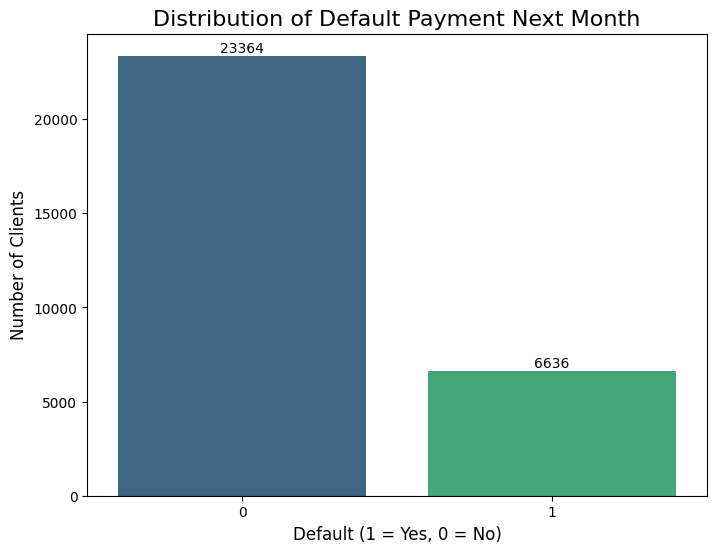

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a count plot of the 'DEFAULT' column
plt.figure(figsize=(8, 6))
sns.countplot(x='DEFAULT', data=df, hue='DEFAULT', palette='viridis', legend=False)

# 2. Add a descriptive title to the plot
plt.title('Distribution of Default Payment Next Month', fontsize=16)

# 3. Label the x-axis as 'Default (1 = Yes, 0 = No)' and the y-axis as 'Number of Clients'
plt.xlabel('Default (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)

# Add count annotations on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 4. Display the plot
plt.show()

## Analyze Numerical Feature Distributions

### Subtask:
Generate histograms for key numerical features to observe their distributions and identify potential outliers or skewness.


**Reasoning**:
The subtask requires generating histograms for numerical features to visualize their distributions. I will identify all numerical columns in the DataFrame `df`, excluding the target variable 'DEFAULT', and then iterate through them to create and display a histogram for each, ensuring proper labeling and sizing as per instructions.



Generating histograms for 23 numerical features...


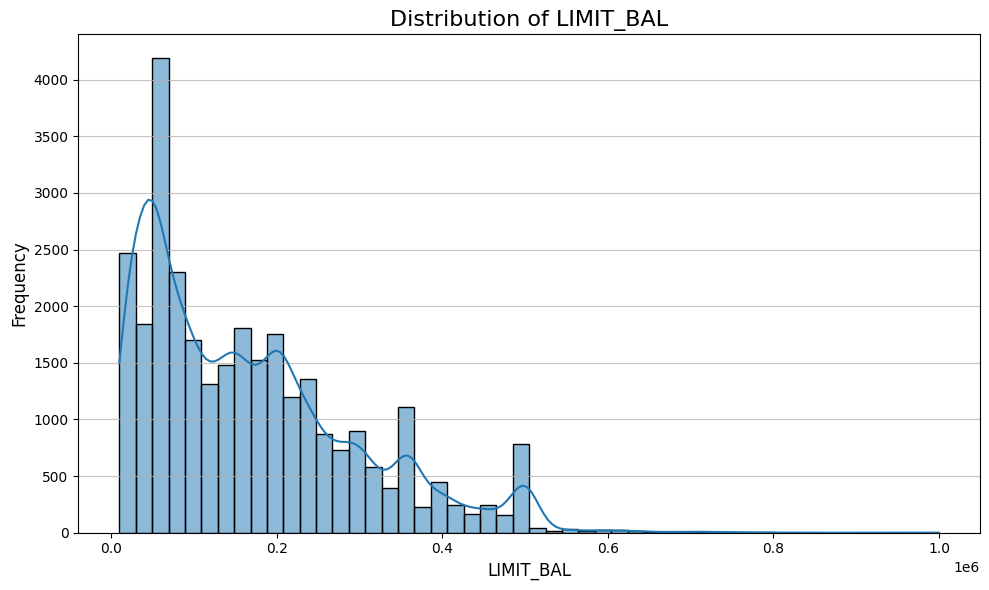

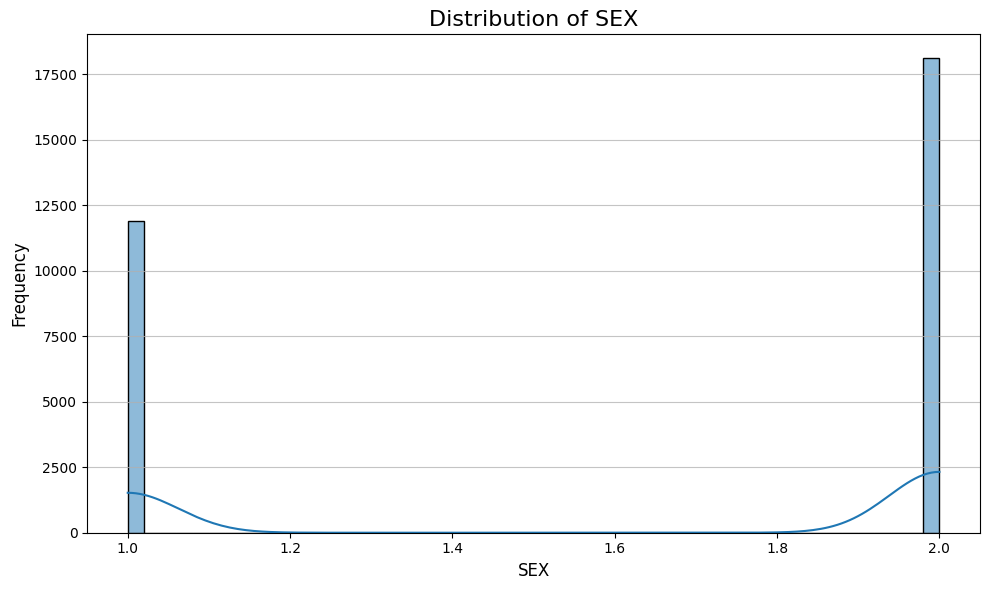

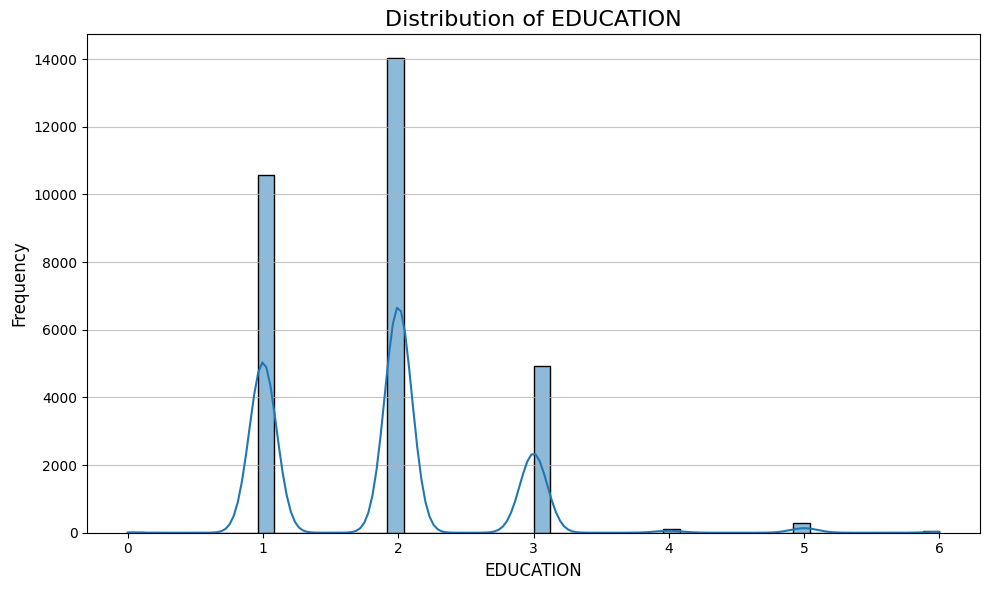

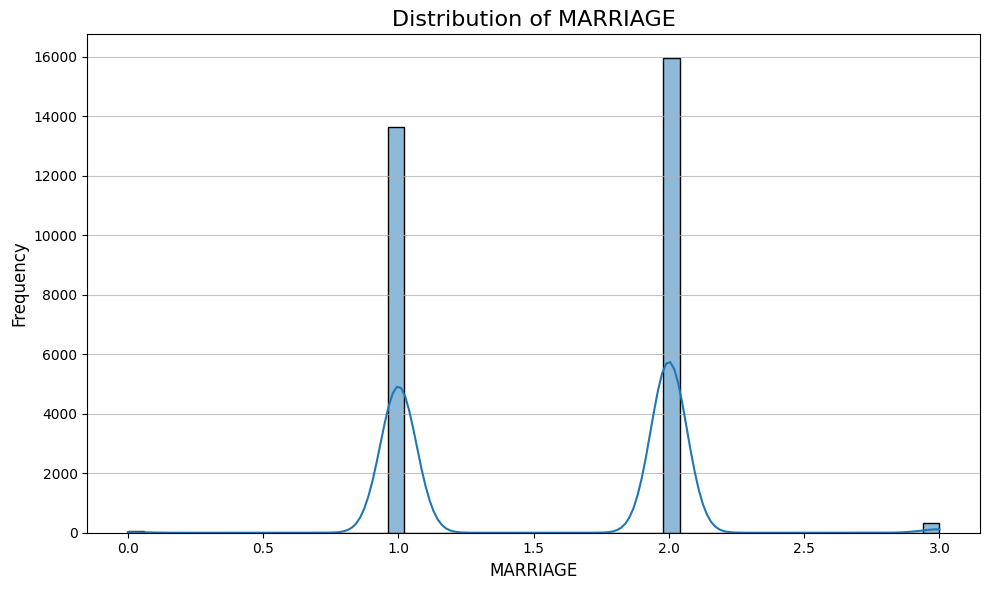

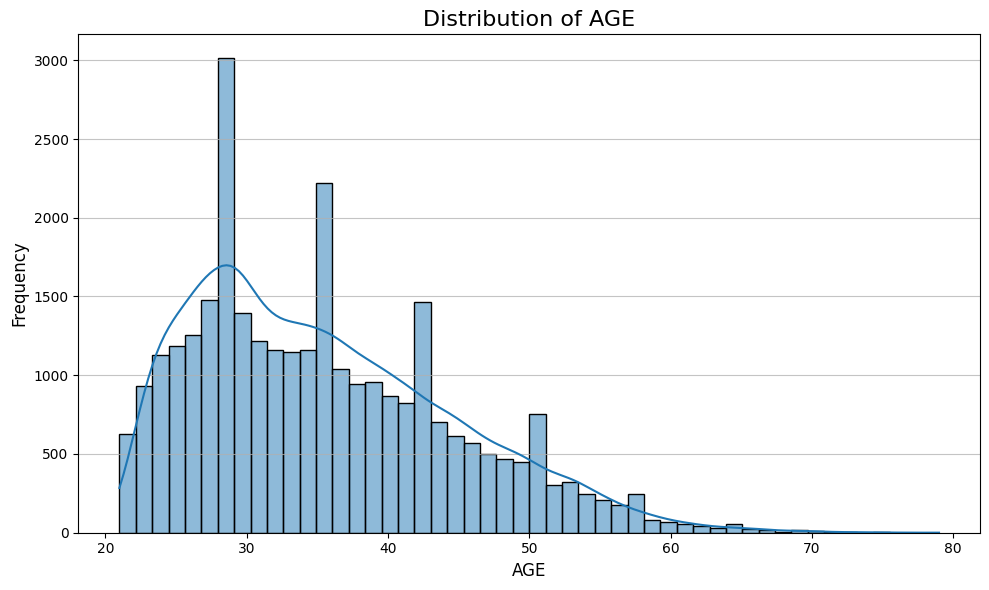

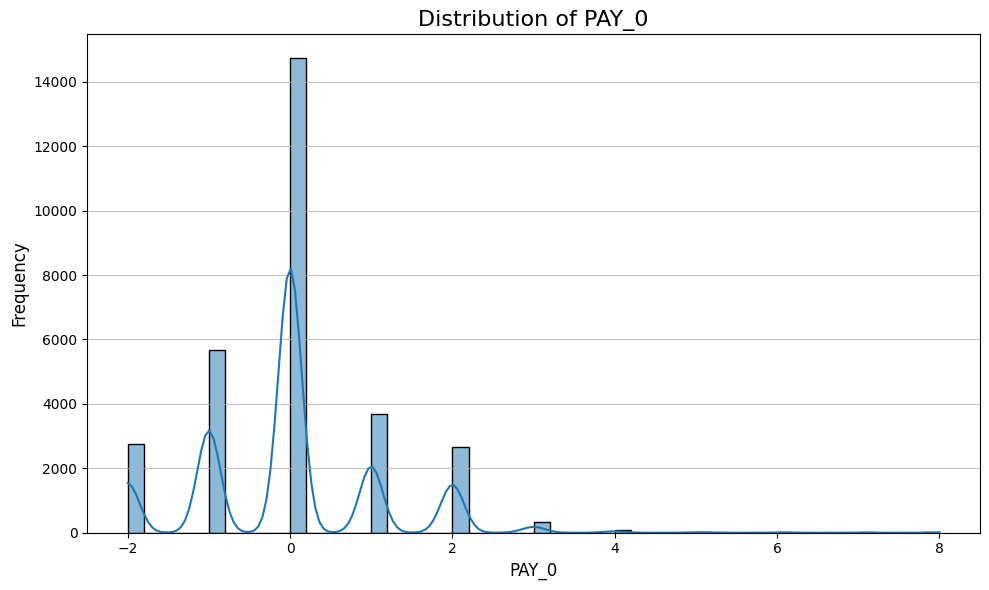

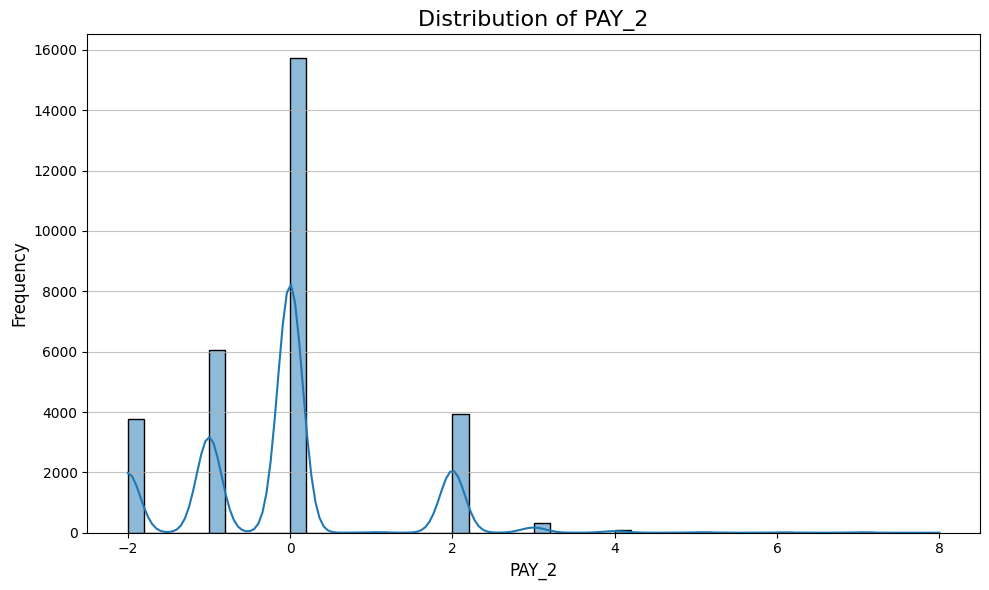

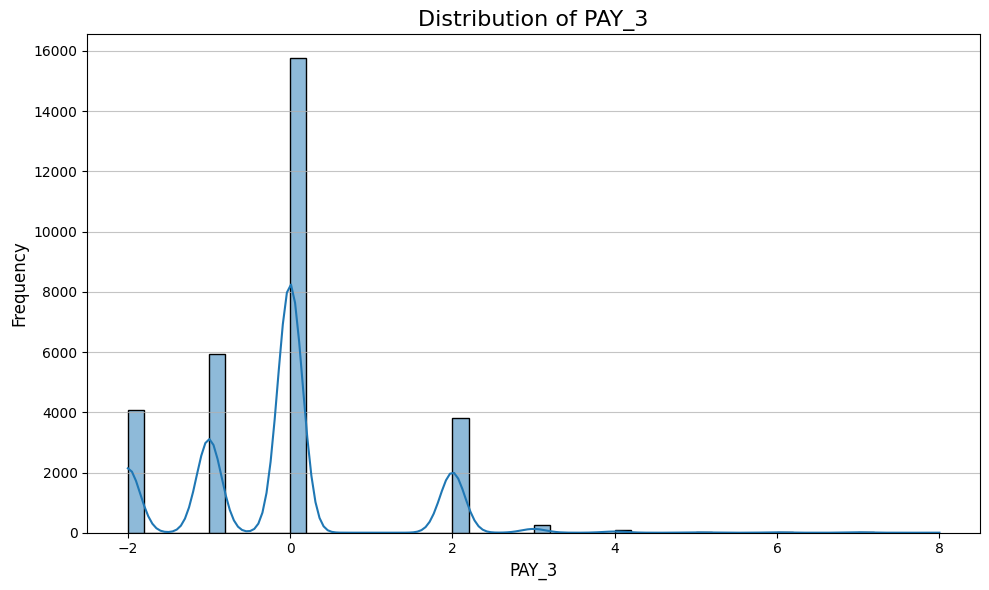

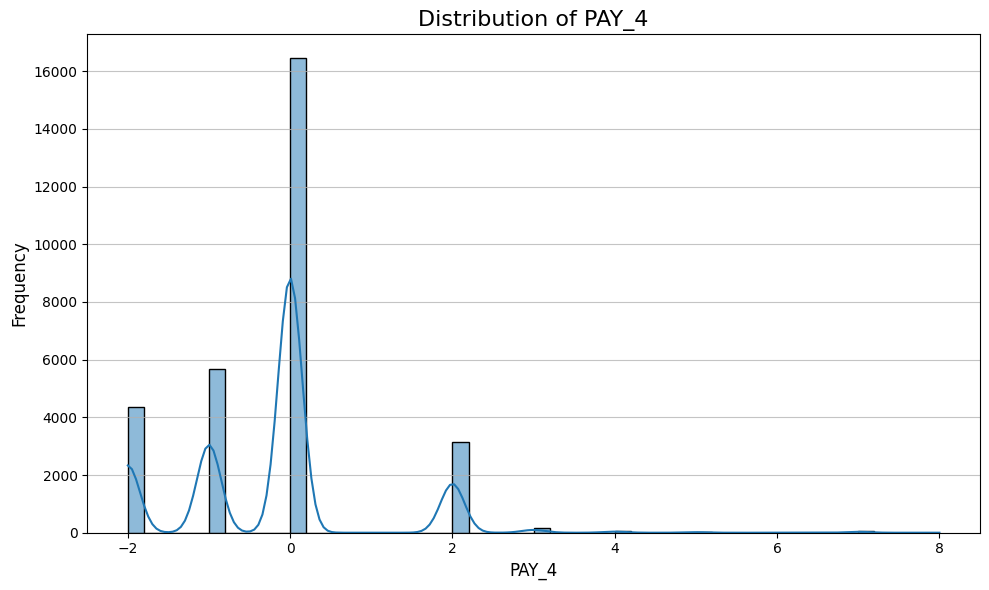

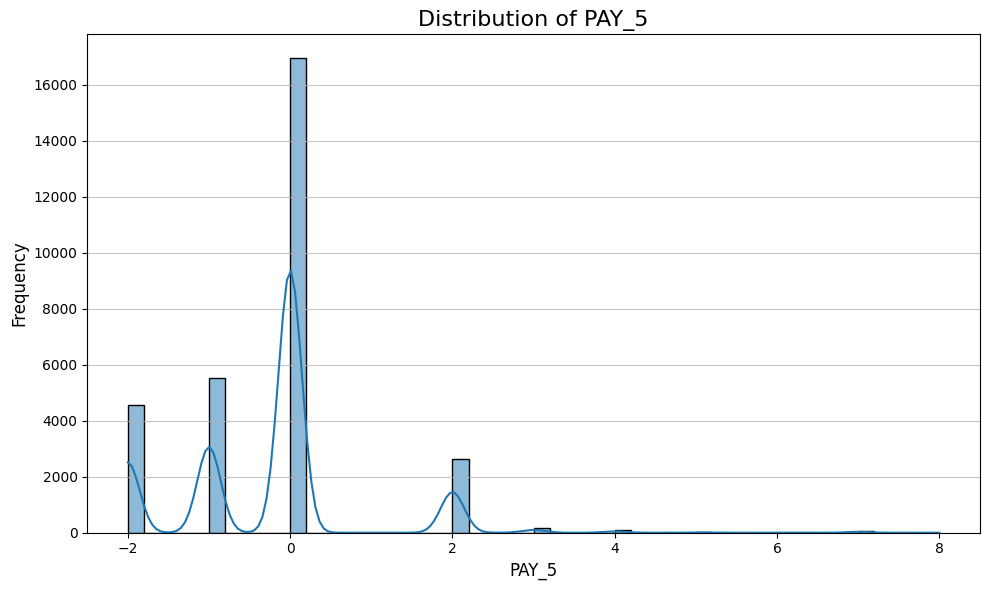

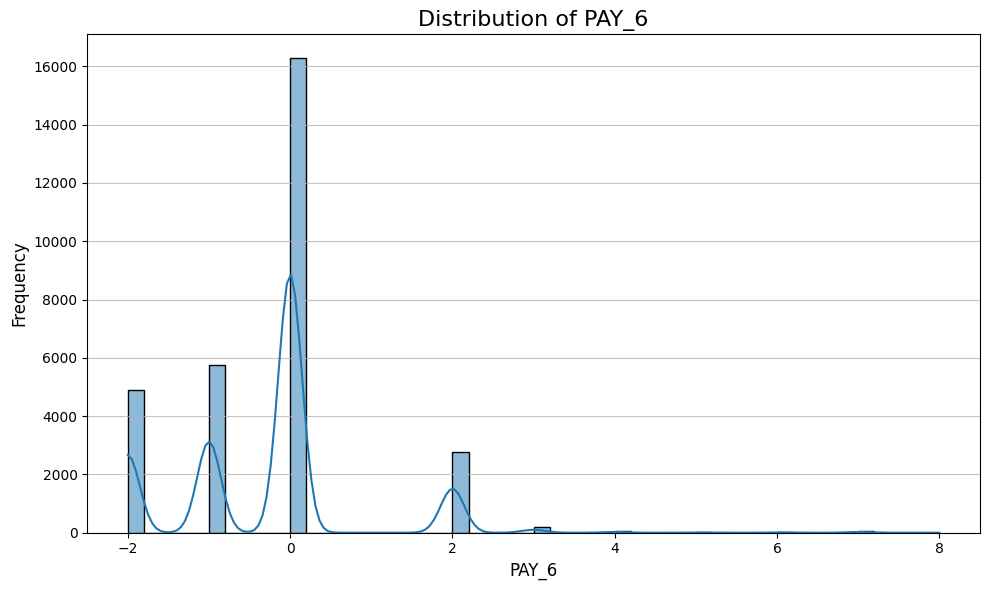

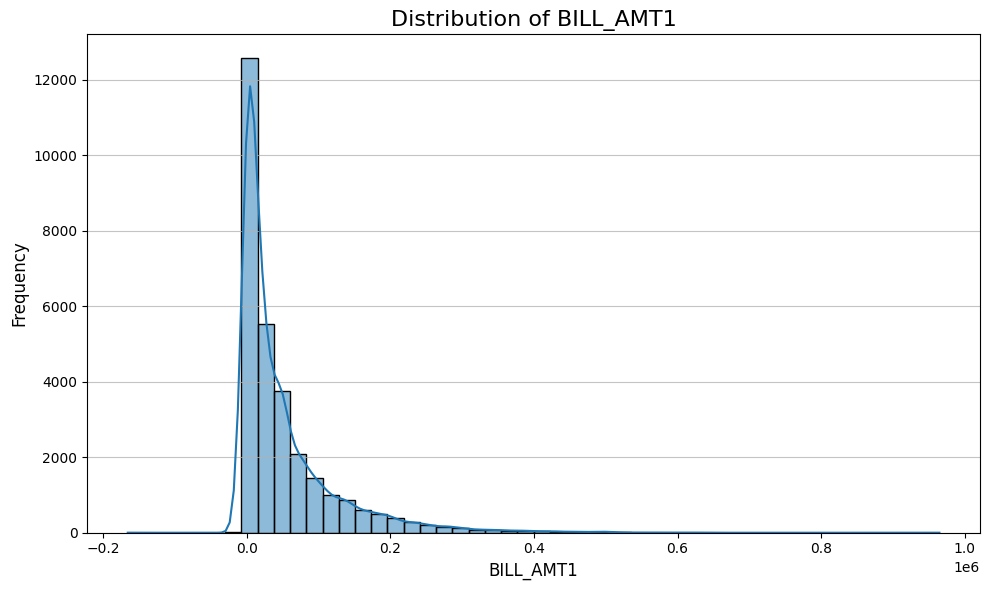

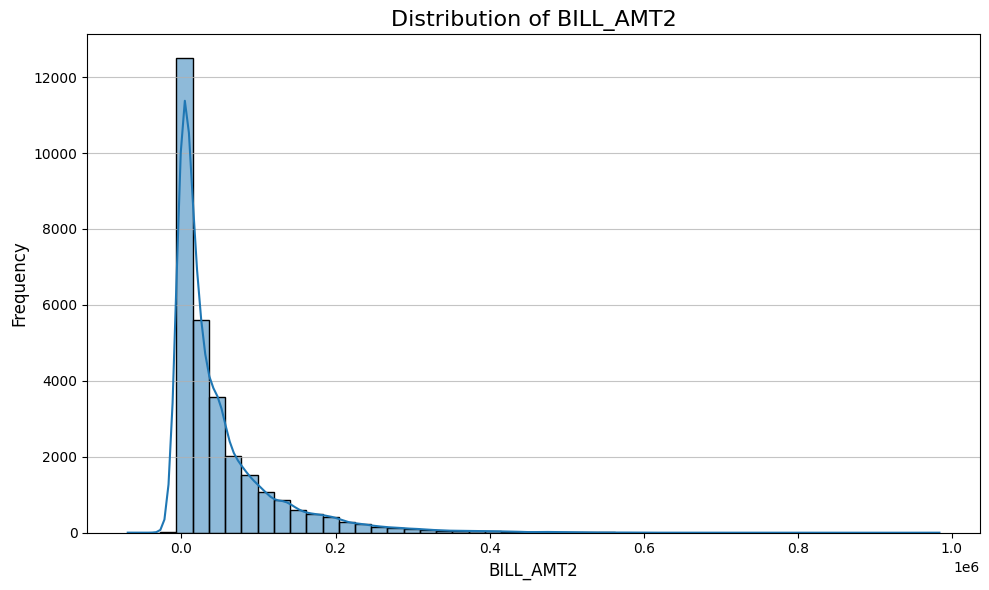

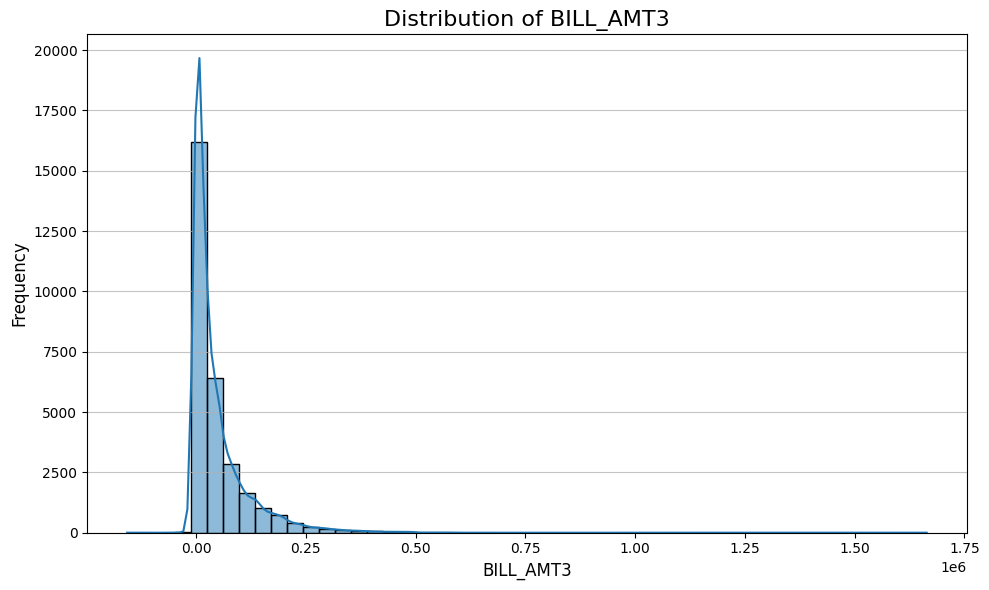

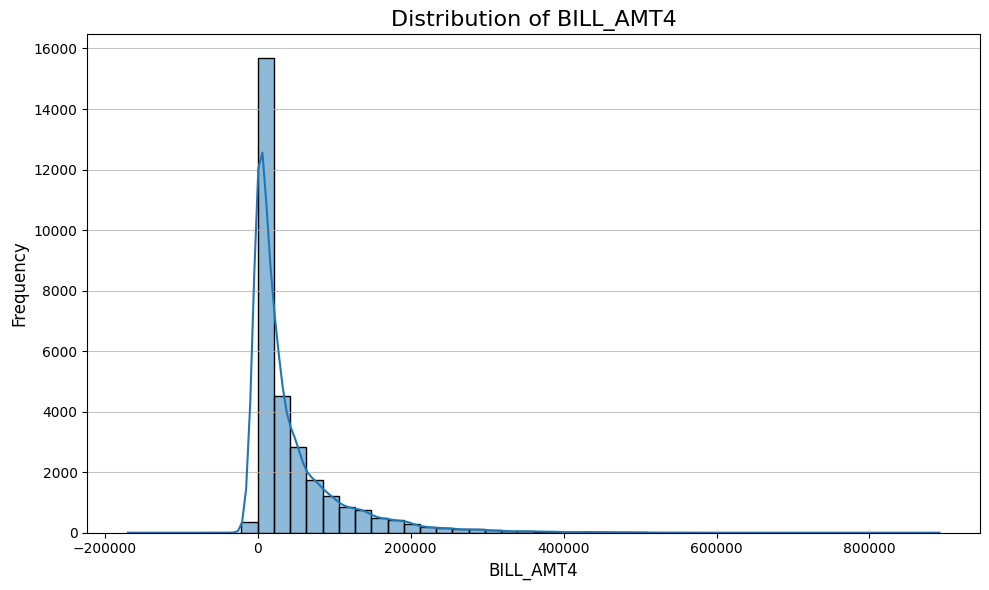

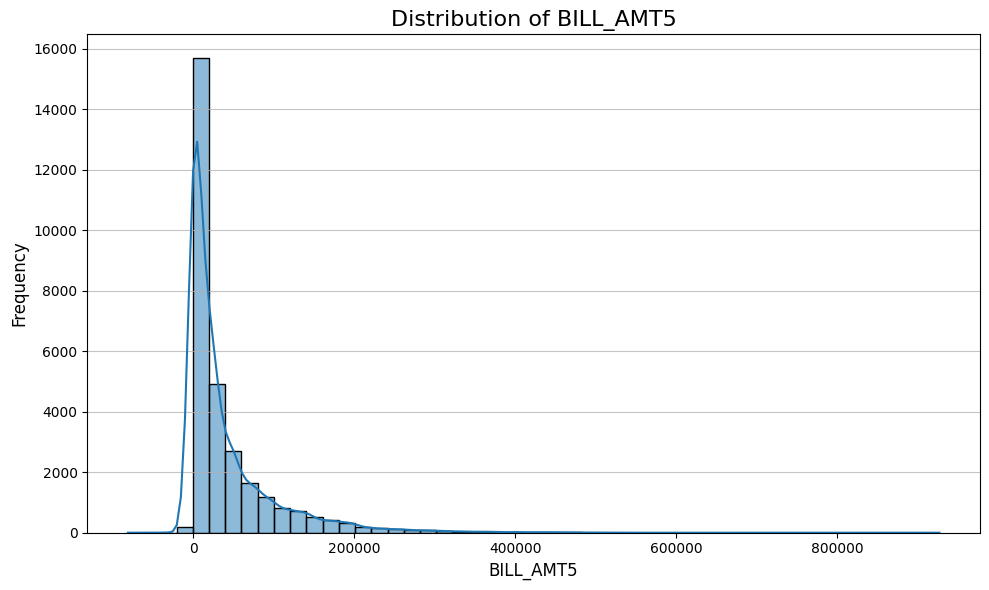

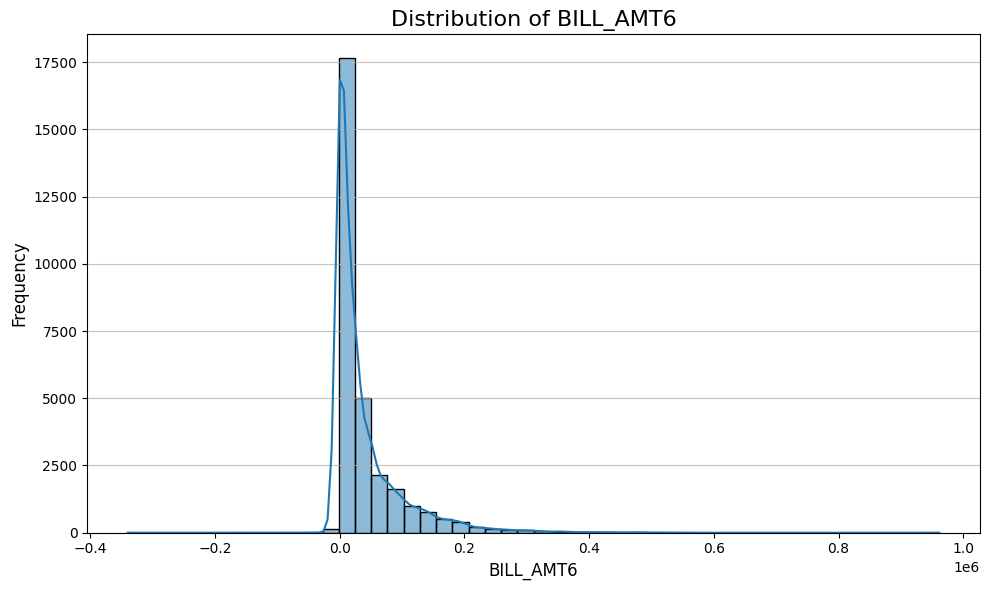

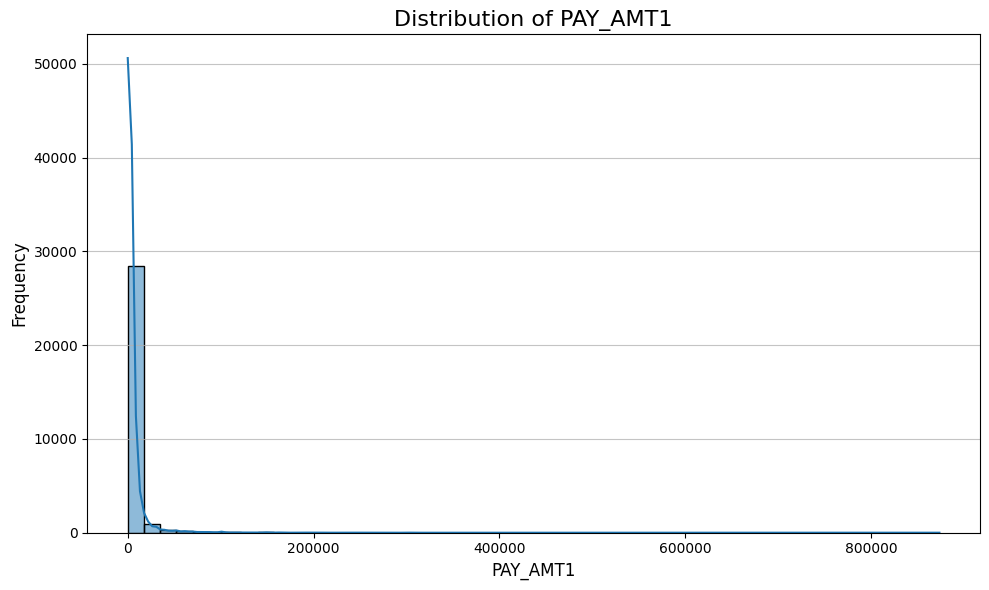

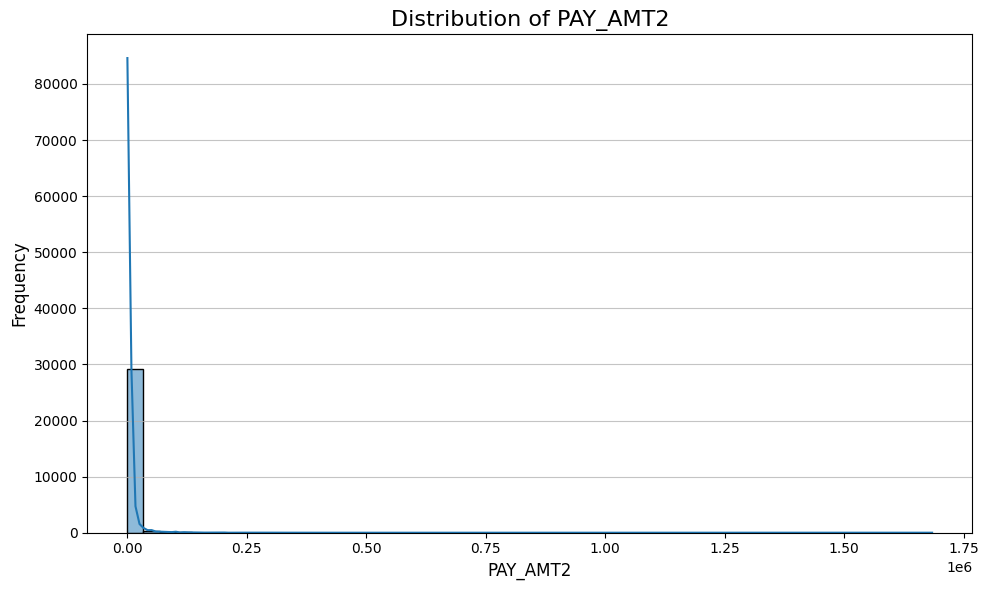

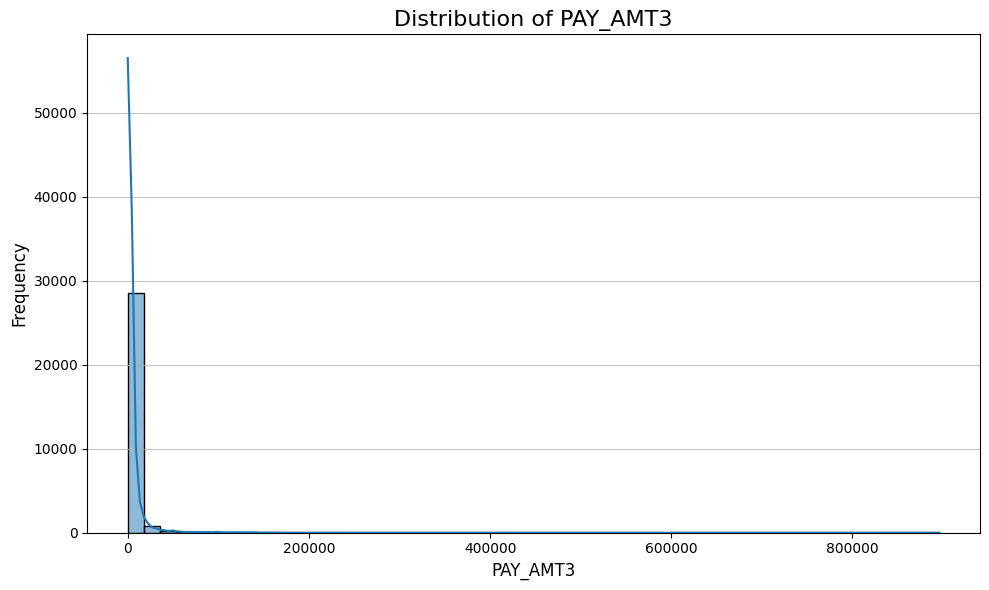

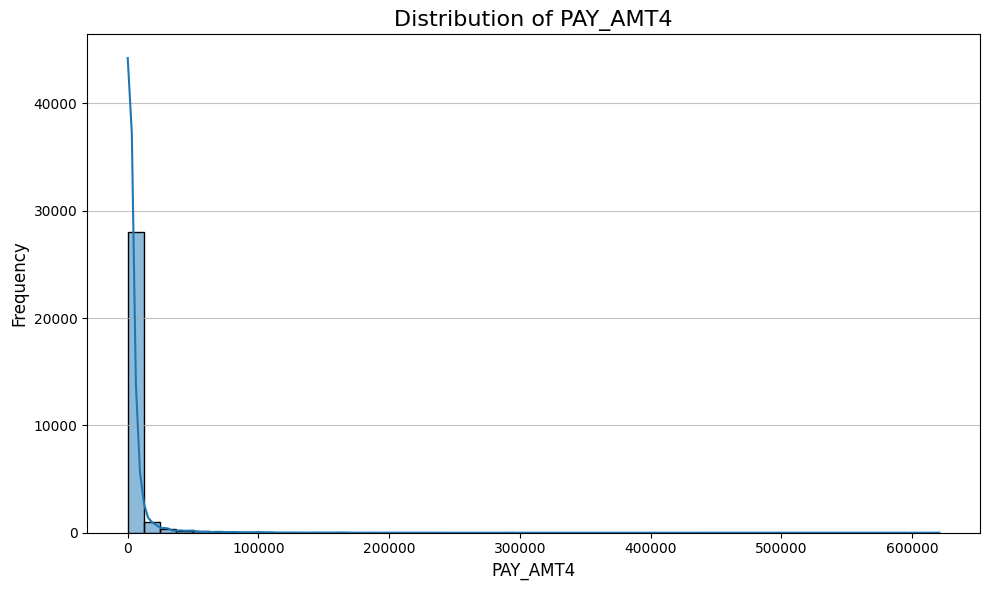

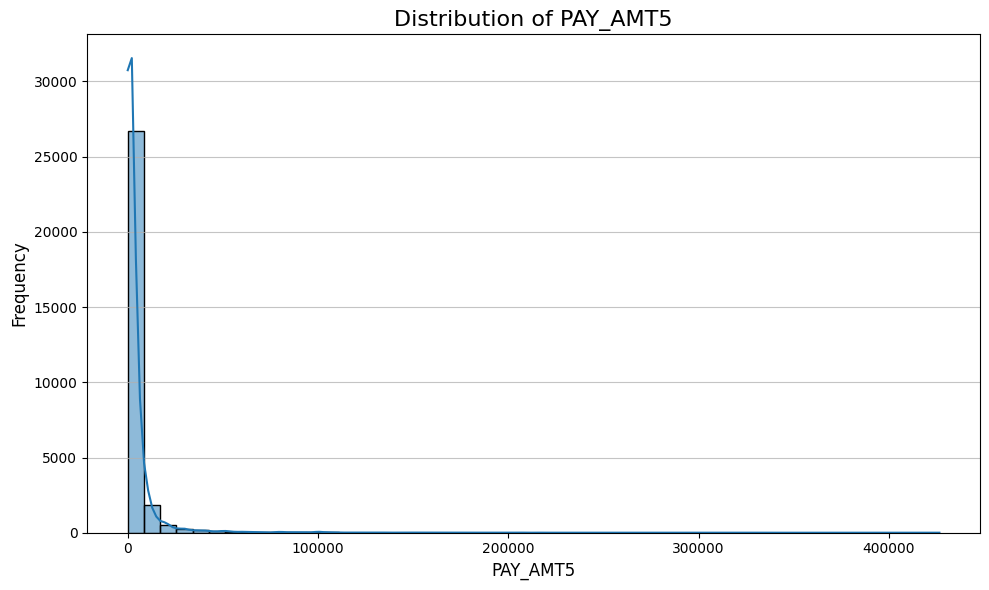

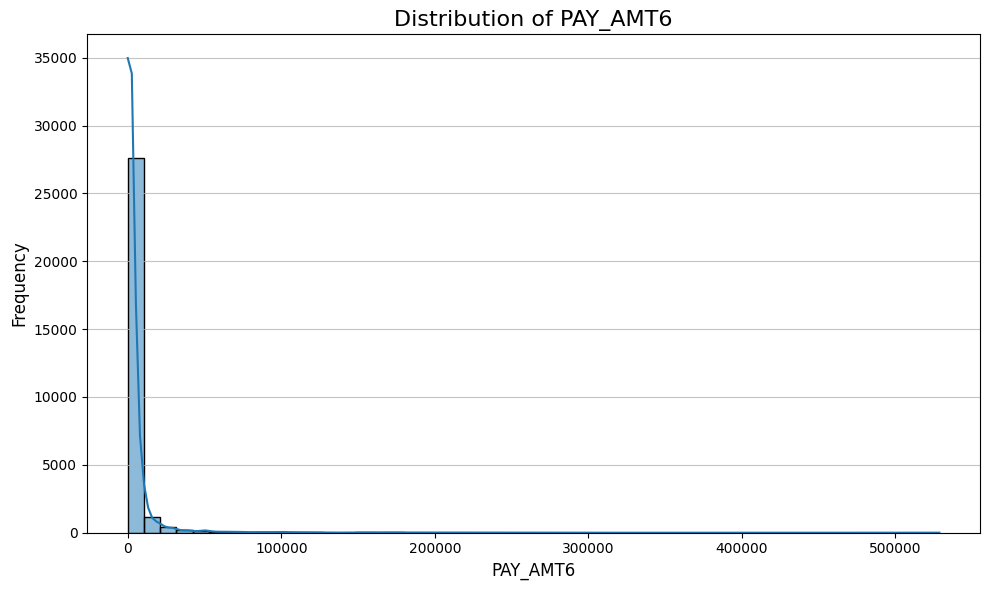

Histograms generated for all selected numerical features.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (excluding the target 'DEFAULT')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'DEFAULT' in numerical_cols:
    numerical_cols.remove('DEFAULT')

print(f"Generating histograms for {len(numerical_cols)} numerical features...")

# Generate histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=50) # kde=True to show the probability density function
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

print("Histograms generated for all selected numerical features.")

## Analyze Categorical Feature Distributions

### Subtask:
Generate count plots for categorical features to understand the distribution of categories within each feature. Provide legends for the plot.


**Reasoning**:
The subtask requires generating count plots for categorical features. I will identify the categorical columns (SEX, EDUCATION, MARRIAGE, PAY_0 to PAY_6), excluding the target 'DEFAULT', and then iterate through them to create and display a count plot for each, ensuring proper labeling and titles.



Generating count plots for 9 categorical features...


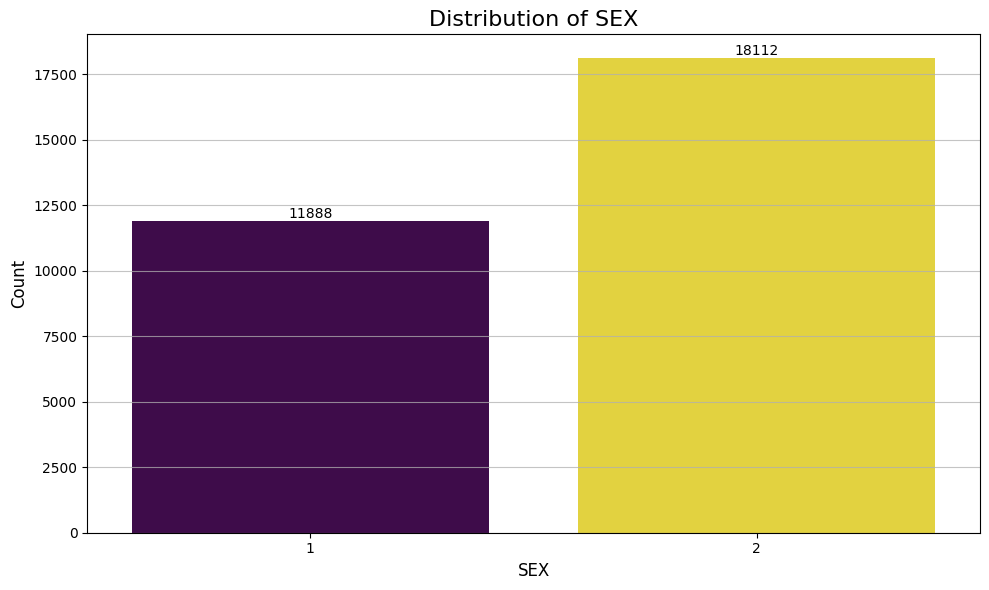

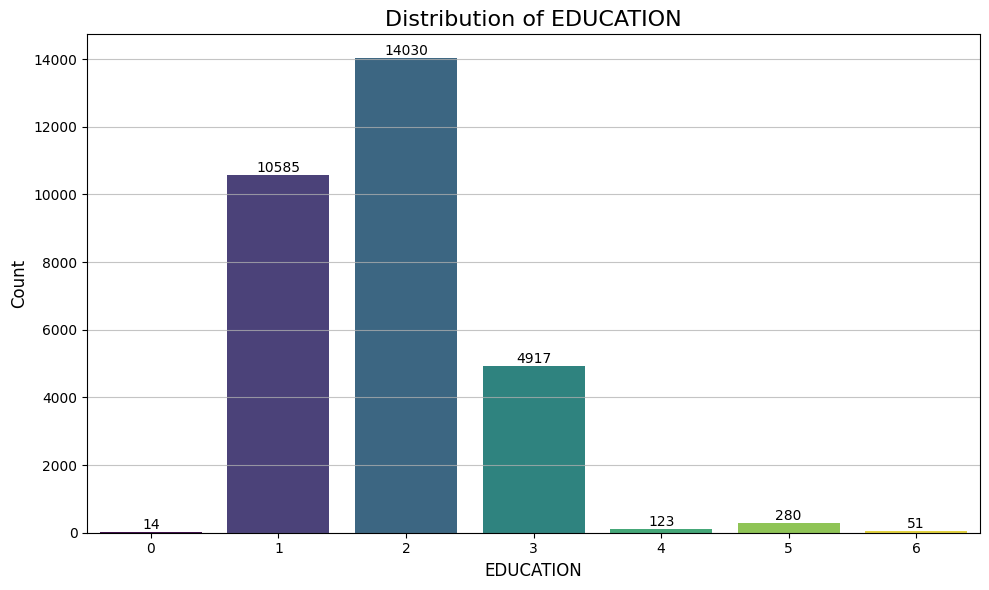

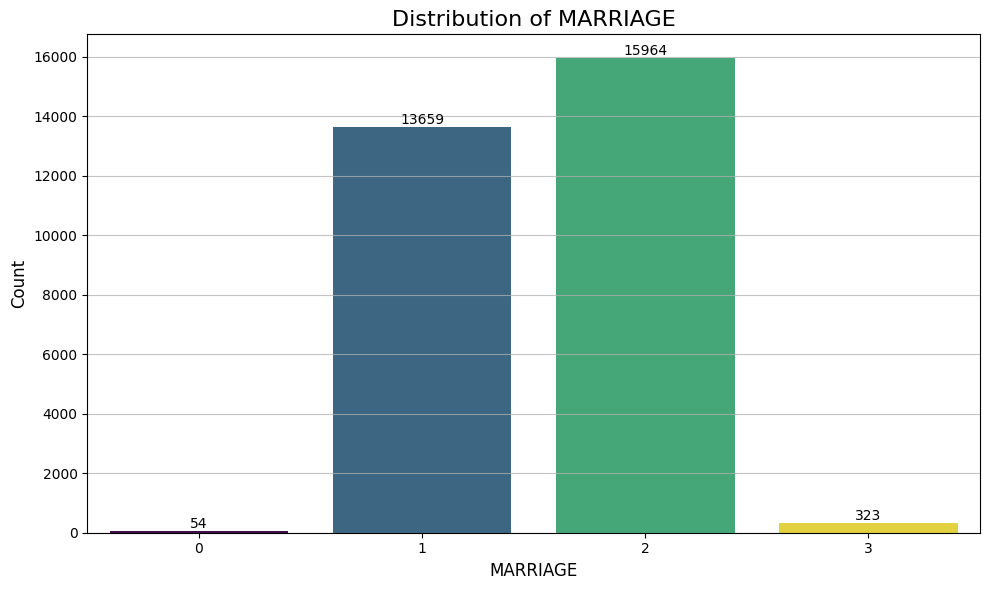

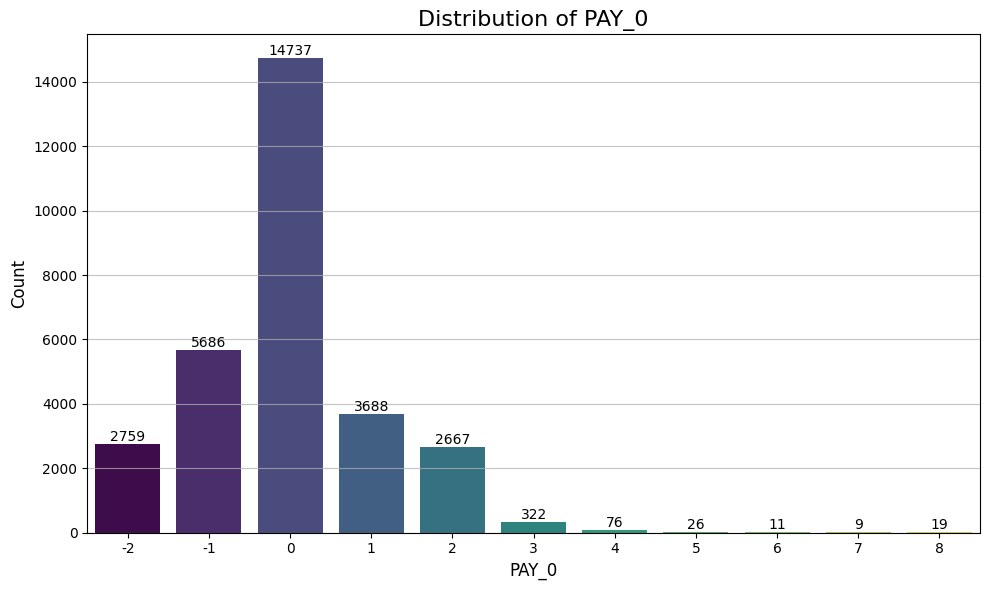

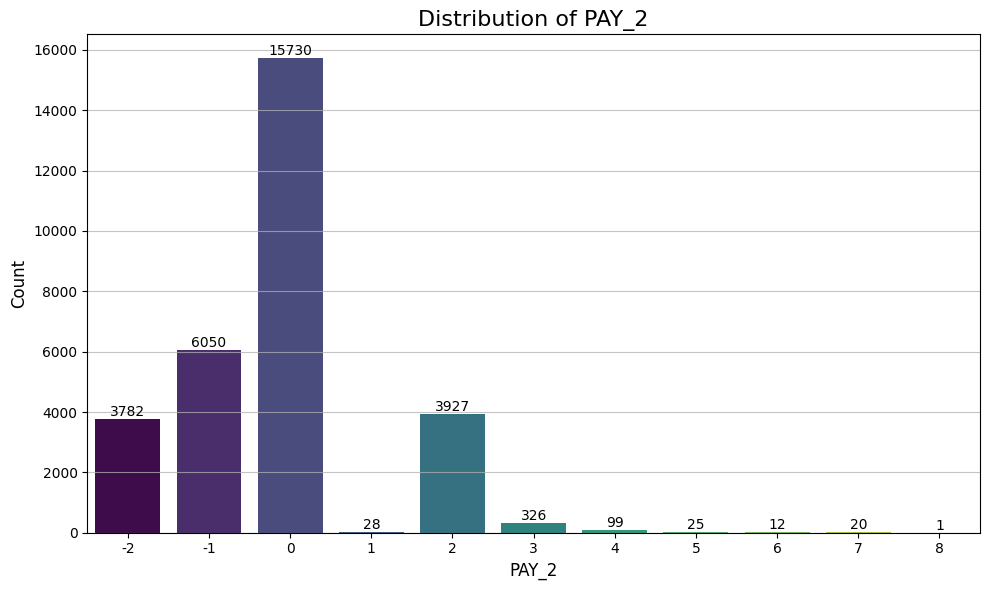

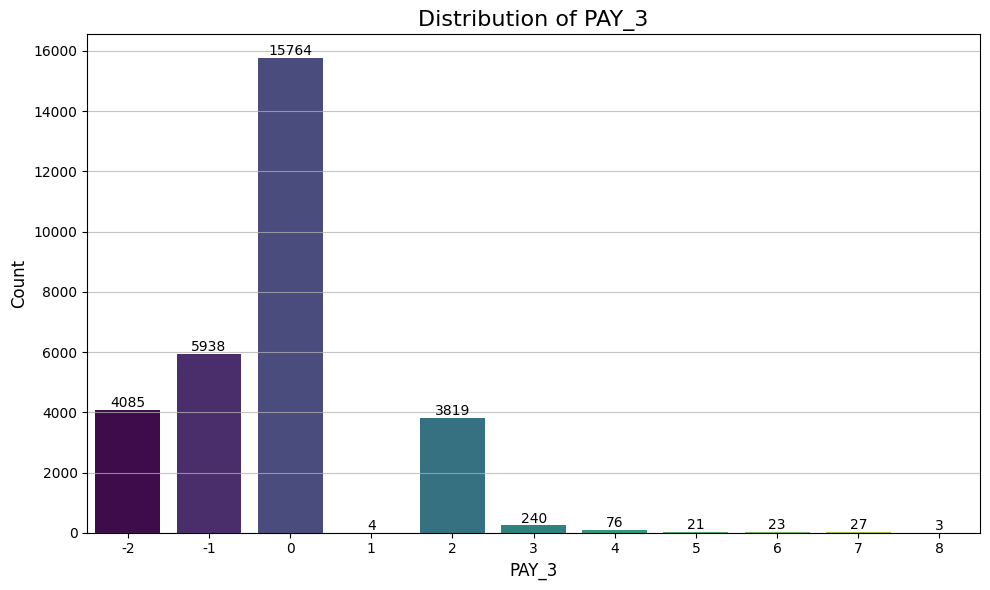

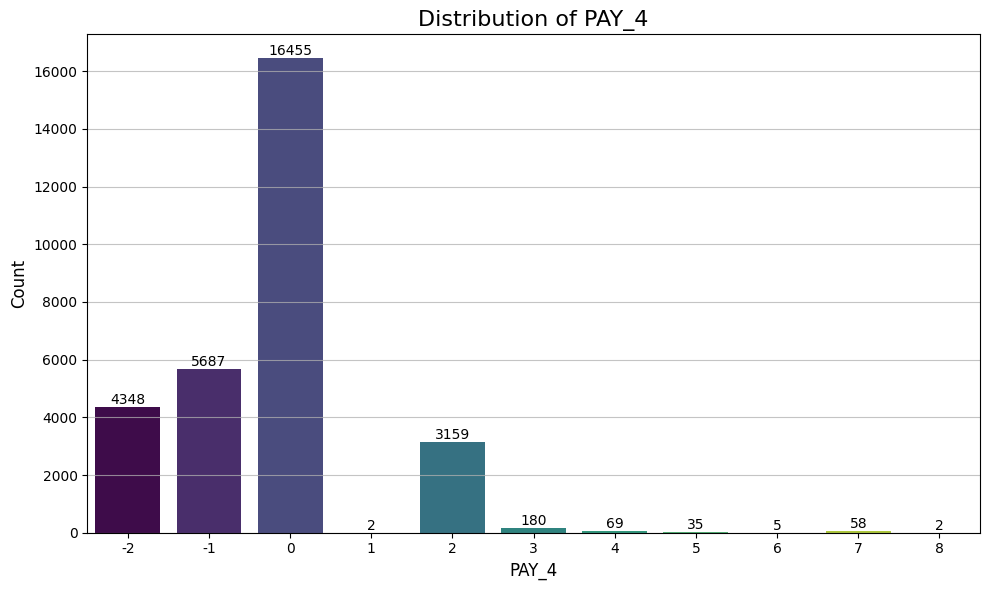

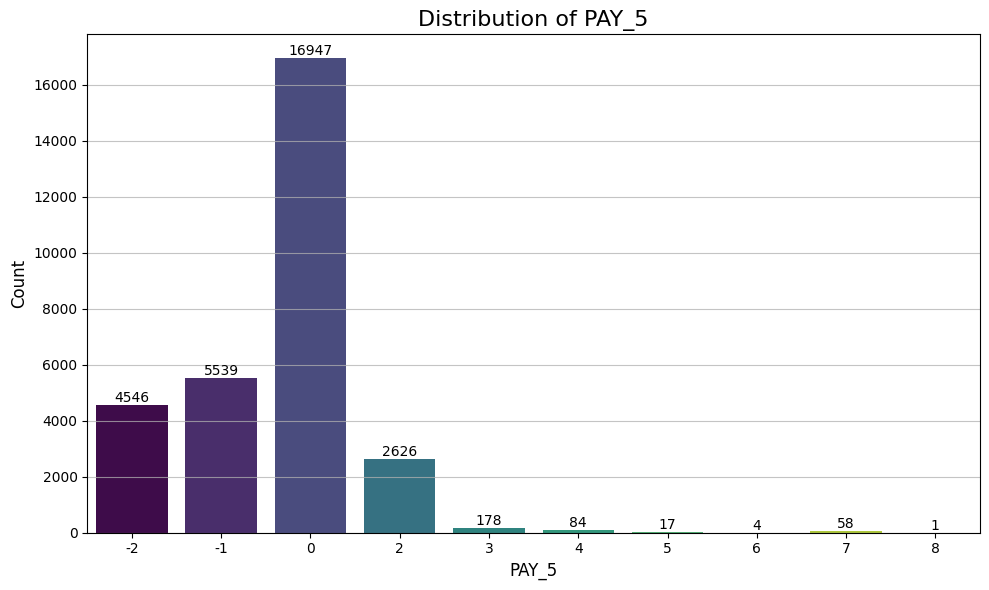

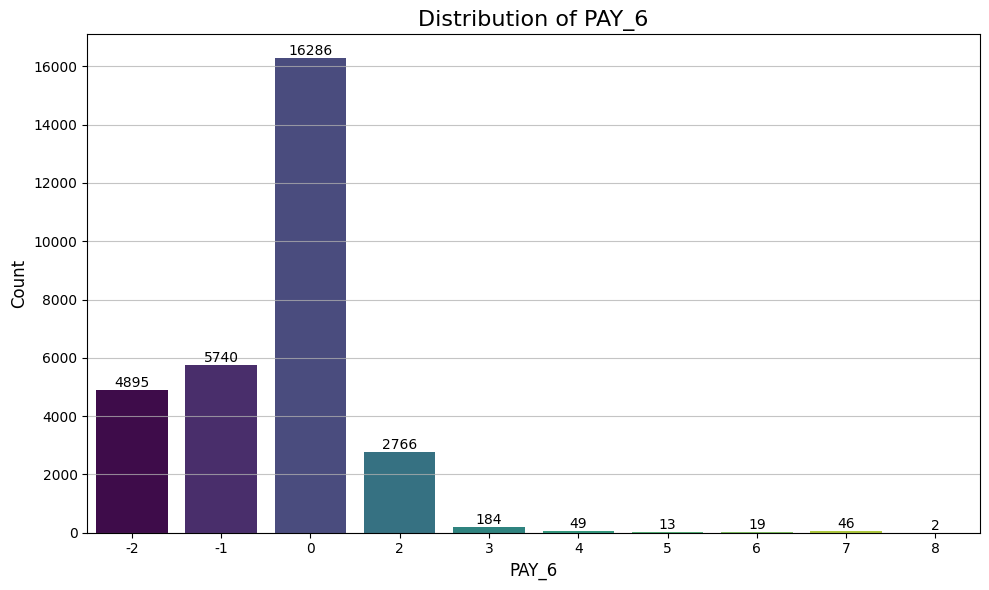

Count plots generated for all selected categorical features.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
# Based on the dataset description and common practice, these columns are categorical
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

print(f"Generating count plots for {len(categorical_cols)} categorical features...")

# Generate count plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, hue=col, palette='viridis', legend=False) # Fix: Added hue=col and legend=False
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', alpha=0.75)

    # Add count annotations on top of the bars for better readability
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

print("Count plots generated for all selected categorical features.")

## Correlation Analysis

### Subtask:
Compute and visualize the correlation matrix of numerical features using a heatmap to identify relationships between variables.


**Reasoning**:
The subtask requires computing and visualizing the correlation matrix of numerical features. I will select numerical columns, compute their correlation, and then display it as a heatmap with appropriate sizing and title.



Selected 24 numerical columns for correlation analysis.


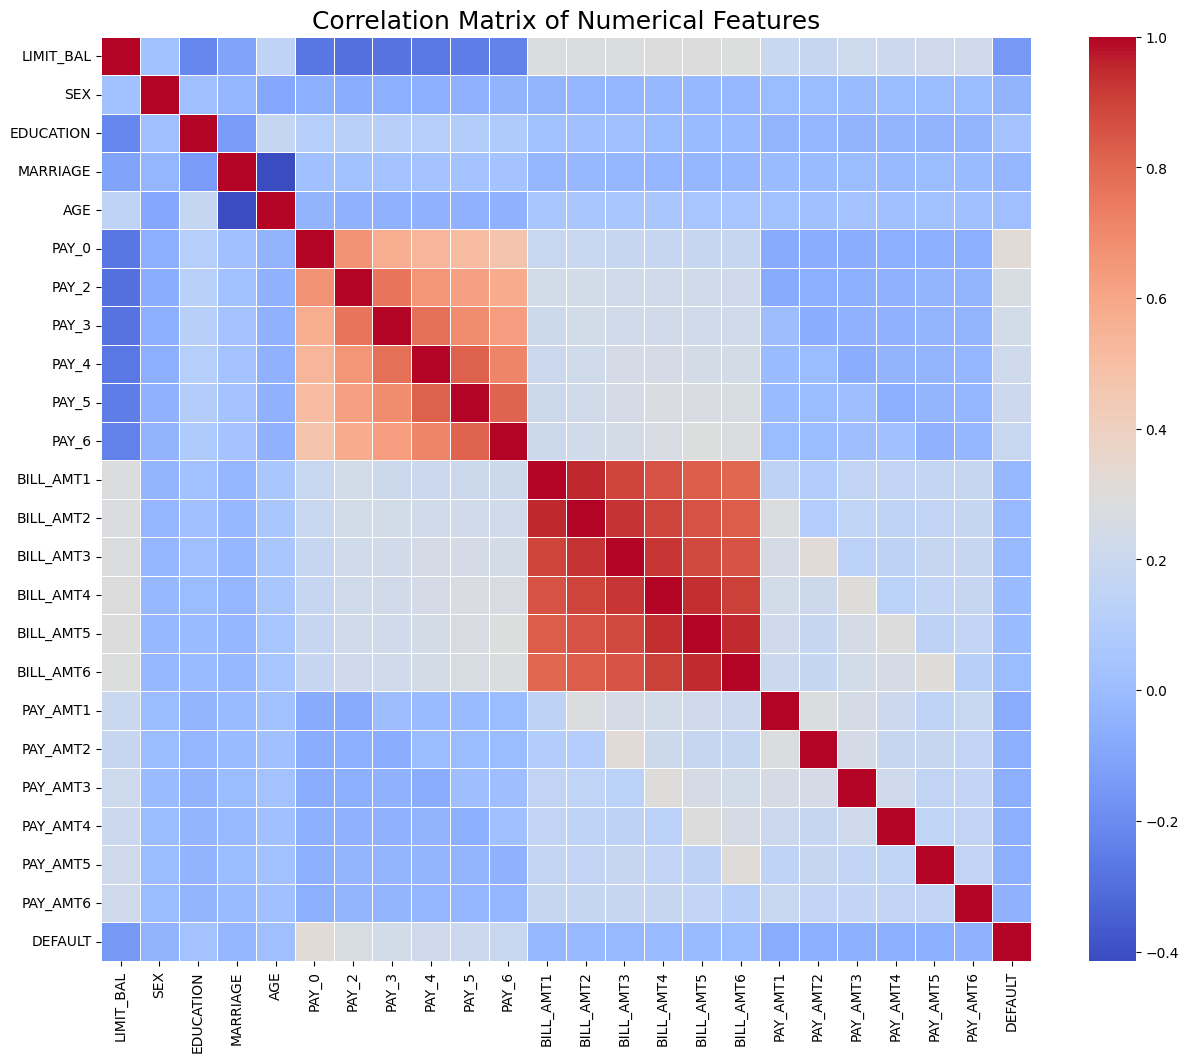

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select all numerical columns from the DataFrame df
numerical_df = df.select_dtypes(include=['int64', 'float64'])

print(f"Selected {numerical_df.shape[1]} numerical columns for correlation analysis.")

# 2. Compute the pairwise correlation between these numerical columns
correlation_matrix = numerical_df.corr()

# 3. Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 12)) # 4. Set an appropriate figure size
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)

# 5. Add a descriptive title to the heatmap
plt.title('Correlation Matrix of Numerical Features', fontsize=18)

# 6. Display the plot
plt.show()

## Summarize the key insights and observations gained from the exploratory data analysis.

### Subtask:
Synthesize findings from the initial data overview, missing values check, target variable distribution, numerical and categorical feature distributions, and correlation analysis into a concise summary.


## Summary of Exploratory Data Analysis (EDA)

This exploratory data analysis was performed on the 'UCI_Credit_Card.csv' dataset to understand its structure, distributions, and relationships between features, with a particular focus on the 'DEFAULT' target variable.

### Initial Data Overview and Completeness:
The dataset contains **30,000 entries and 24 columns**, representing various attributes of credit card clients. The columns primarily consist of `float64` and `int64` data types. A crucial finding from the initial check was the **absence of any missing values** across all columns, indicating a complete dataset for analysis.

### Target Variable Distribution (DEFAULT):
The target variable, 'DEFAULT' (indicating default payment next month), shows a clear **class imbalance**. Out of 30,000 clients, **23,364 clients (approximately 77.88%) did not default**, while **6,636 clients (approximately 22.12%) did default**. This imbalance needs to be considered during model training to avoid biases towards the majority class.

### Numerical Feature Distributions:
*   **LIMIT_BAL**: The credit limit distribution is right-skewed, with a high concentration of clients having lower credit limits (e.g., 50,000 to 100,000 NT dollars) and a long tail extending to much higher limits. This indicates a diverse range of credit capabilities among clients.
*   **AGE**: The age distribution appears to be somewhat normally distributed, centered around 30-40 years, with a spread from 21 to 79 years. This suggests the dataset covers a broad age demographic.
*   **BILL_AMT (1-6)**: All bill amount features (BILL_AMT1 to BILL_AMT6) are highly right-skewed, indicating that most clients have relatively low outstanding balances, but a few have very large balances. Interestingly, some negative bill amounts are present, which could signify credits or refunds.
*   **PAY_AMT (1-6)**: The payment amount features (PAY_AMT1 to PAY_AMT6) are also highly right-skewed, with a significant number of entries at or near zero. This implies many clients make minimal or no payments in a given month, and only a small fraction make large payments. There are also large outliers in payment amounts.

### Categorical Feature Distributions:
*   **SEX**: The dataset contains more female clients (labeled '2') than male clients (labeled '1').
*   **EDUCATION**: The majority of clients have a university (2) or graduate school (1) education. High school (3) is also significantly represented, while other categories (0, 4, 5, 6) are less common.
*   **MARRIAGE**: Most clients are either single (2) or married (1), with a smaller proportion categorized as 'others' (3) or 'unknown' (0).
*   **PAY_X (0-6)**: The payment status features (PAY_0 to PAY_6) reveal important patterns. A large number of clients have a payment status of 0 (paid on time), -1 (duly pay), or -2 (no consumption). However, there are noticeable counts for positive values (1, 2, 3, etc.), indicating varying degrees of payment delays. Statuses of 2 or more represent significant delays, and their presence suggests a segment of clients with consistent repayment issues.

### Correlation Analysis:
*   **Strong Positive Correlations**: There are very strong positive correlations among the `BILL_AMT` features (e.g., BILL_AMT1 to BILL_AMT6). This is expected as outstanding balances from one month often carry over or directly influence the next. Similarly, `PAY_X` features (payment status) exhibit strong positive correlations, indicating that if a client has a payment delay in one month, they are likely to have delays in subsequent months.
*   **Moderate Correlations**: The 'DEFAULT' target variable shows a moderate positive correlation with the `PAY_X` features, particularly `PAY_0`, `PAY_2`, and `PAY_3`. This suggests that past payment behavior, specifically delays, is a significant indicator of future default. `LIMIT_BAL` shows a weak negative correlation with `PAY_X` columns, implying that higher credit limits might be associated with slightly better payment behavior. Other demographic features like `SEX`, `EDUCATION`, `MARRIAGE`, and `AGE` show relatively weak correlations with the target variable and other financial features.

In conclusion, the dataset is clean and complete, but it presents a class imbalance in the target variable. Key features related to bill amounts and past payment statuses show significant skewness and strong internal correlations. The payment delay indicators (`PAY_X` columns) are the most correlated features with the 'DEFAULT' target, highlighting their importance for predictive modeling.

## Summary:

### Data Analysis Key Findings

*   The dataset comprises 30,000 entries and 24 features after initial cleaning, which included dropping the 'ID' column and renaming 'default.payment.next.month' to 'DEFAULT'. All features are either `int64` or `float64` data types.
*   The dataset is complete with **no missing values** identified across any of its columns.
*   The target variable, 'DEFAULT', exhibits a significant **class imbalance**: 22.12% (6,636 clients) defaulted on their credit card payments, while 77.88% (23,364 clients) did not.
*   **Numerical features** such as `LIMIT_BAL`, `BILL_AMT` (bill statement amounts), and `PAY_AMT` (previous payment amounts) are all highly right-skewed, indicating that most clients have lower values for these attributes, with a few outliers having very high values. Negative values were observed in `BILL_AMT` columns, possibly indicating credits. The `AGE` distribution is somewhat normally distributed, centered around 30-40 years.
*   **Categorical features** reveal that there are more female clients than male clients. The majority of clients have a university or graduate school education, and most are either single or married. The `PAY_X` (payment status) features show a mix of on-time payments (0, -1, -2) and varying degrees of payment delays (1, 2, 3, etc.), indicating different repayment behaviors.
*   **Correlation analysis** shows strong positive correlations within `BILL_AMT` features and among `PAY_X` features. Crucially, the 'DEFAULT' target variable demonstrates a **moderate positive correlation with the `PAY_X` features**, particularly `PAY_0`, `PAY_2`, and `PAY_3`, suggesting that past payment behavior is a key indicator of future default. Demographic features (`SEX`, `EDUCATION`, `MARRIAGE`, `AGE`) show relatively weak correlations with the target variable.

### Insights or Next Steps

*   The identified class imbalance in the 'DEFAULT' variable (22.12% defaulters) necessitates the use of appropriate techniques such as oversampling, undersampling, or using algorithms robust to imbalance during model training to prevent bias towards the majority class.
*   Given the moderate to strong correlations between 'DEFAULT' and the `PAY_X` features (payment status), these variables should be considered highly important for predictive modeling, potentially warranting feature engineering to capture the severity and consistency of payment delays.


# Task
The current task is to preprocess the dataset by encoding categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', and 'PAY_X' features) using one-hot encoding.

## Prepare Data for Modeling

### Subtask:
Preprocess the dataset by encoding categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', and 'PAY_X' features) using one-hot encoding.


**Reasoning**:
The subtask requires one-hot encoding specific categorical columns. I will identify these columns, apply `pd.get_dummies` with `drop_first=True` and a prefix, concatenate the results with the original DataFrame, drop the initial categorical columns, and then display the head and shape of the modified DataFrame.



In [7]:
import pandas as pd
import os
import kagglehub

# Ensure the dataset is downloaded and the 'path' variable is set
# This re-runs the successful kagglehub download from cell uzRENLiOA62l
print("Ensuring dataset is downloaded via kagglehub...")
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")
print(f"Dataset files located at: {path}")

# Define the correct file path
data_file_path = os.path.join(path, 'UCI_Credit_Card.csv')

print(f"Re-initializing DataFrame for one-hot encoding from '{os.path.basename(data_file_path)}'...")

try:
    # Load the CSV file without skipping the first row to get correct headers
    df = pd.read_csv(data_file_path)

    # Rename the target column
    if 'default.payment.next.month' in df.columns:
        df = df.rename(columns={'default.payment.next.month': 'DEFAULT'})
        print("Renamed 'default.payment.next.month' to 'DEFAULT'.")
    elif 'default payment next month' in df.columns:
        df = df.rename(columns={'default payment next month': 'DEFAULT'})
        print("Renamed 'default payment next month' to 'DEFAULT'.")
    else:
        print("Target column 'default.payment.next.month' or 'default payment next month' not found.")

    # Strip whitespace from column names
    df.columns = df.columns.str.strip()
    print("Stripped whitespace from column names.")

    # Drop the 'ID' column if it exists
    if 'ID' in df.columns:
        df = df.drop(columns=['ID'])
        print("Dropped 'ID' column.")
    else:
        print("No 'ID' column found to drop.")

    print("DataFrame re-initialized successfully for encoding.")

    # 1. Identify the categorical columns for one-hot encoding
    categorical_cols_to_encode = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

    print(f"\nApplying one-hot encoding to columns: {categorical_cols_to_encode}")

    # Ensure that all columns to encode exist in the DataFrame
    existing_categorical_cols = [col for col in categorical_cols_to_encode if col in df.columns]
    if len(existing_categorical_cols) != len(categorical_cols_to_encode):
        print("Warning: Some specified categorical columns were not found in the DataFrame. Encoding only existing ones.")
    categorical_cols_to_encode = existing_categorical_cols # Update list to only include existing ones

    # Convert columns to 'category' dtype to ensure get_dummies processes them as such
    for col in categorical_cols_to_encode:
        df[col] = df[col].astype('category')

    # 2. Apply one-hot encoding to these columns using the 'columns' argument
    # This directly modifies the df, adds dummy variables, and drops the original columns.
    df = pd.get_dummies(df, columns=categorical_cols_to_encode, prefix=categorical_cols_to_encode, drop_first=True, dtype=int)


    print("One-hot encoding complete. Displaying first few rows and shape of the updated DataFrame.")

    # 4. Display the first few rows of the updated DataFrame
    print("\nFirst 5 rows of the updated DataFrame:")
    print(df.head())

    # Display its shape to verify the changes
    print(f"\nShape of the updated DataFrame: {df.shape}")

except Exception as e:
    print(f"An error occurred during re-initialization or one-hot encoding: {e}")
    df = None

Ensuring dataset is downloaded via kagglehub...
Using Colab cache for faster access to the 'default-of-credit-card-clients-dataset' dataset.
Dataset files located at: /kaggle/input/default-of-credit-card-clients-dataset
Re-initializing DataFrame for one-hot encoding from 'UCI_Credit_Card.csv'...
Renamed 'default.payment.next.month' to 'DEFAULT'.
Stripped whitespace from column names.
Dropped 'ID' column.
DataFrame re-initialized successfully for encoding.

Applying one-hot encoding to columns: ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
One-hot encoding complete. Displaying first few rows and shape of the updated DataFrame.

First 5 rows of the updated DataFrame:
   LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0    20000.0   24     3913.0     3102.0      689.0        0.0        0.0   
1   120000.0   26     2682.0     1725.0     2682.0     3272.0     3455.0   
2    90000.0   34    29239.0    14027.0    13559.0    143

## Prepare Data for Modeling

### Subtask:
Split the data into training and testing sets and scale numerical features.


**Reasoning**:
The subtask requires splitting the data into training and testing sets, identifying numerical features, and then scaling these features. This block will perform all these steps sequentially, including importing necessary libraries, separating features from the target, performing the split, identifying the numerical columns to scale, initializing and applying the StandardScaler, and finally updating the DataFrames with the scaled values.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Separate features (X) from the target variable ('DEFAULT')
X = df.drop('DEFAULT', axis=1)
y = df['DEFAULT']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# 2. Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 3. Identify the numerical features to scale
# These are the columns that were not one-hot encoded and are continuous.
numerical_features = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

# Ensure all identified numerical features actually exist in X_train
numerical_features = [col for col in numerical_features if col in X_train.columns]

print(f"\nNumerical features identified for scaling: {numerical_features}")

# 4. Initialize a StandardScaler
scaler = StandardScaler()

# 5. Fit the scaler on the numerical features of the training set and transform both training and testing sets
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("\nNumerical features scaled successfully.")

# 6. Display the first few rows of the scaled training and testing sets to verify
print("\nFirst 5 rows of X_train after scaling:")
print(X_train.head())

print("\nFirst 5 rows of X_test after scaling:")
print(X_test.head())

Shape of features (X): (30000, 82)
Shape of target (y): (30000,)
Shape of X_train: (21000, 82)
Shape of X_test: (9000, 82)
Shape of y_train: (21000,)
Shape of y_test: (9000,)

Numerical features identified for scaling: ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Numerical features scaled successfully.

First 5 rows of X_train after scaling:
       LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
11018  -0.057791 -0.373240   1.424699   1.505293   1.577598   1.706096   
1710   -0.520169 -0.590997  -0.309799  -0.228184  -0.068394   0.127656   
4618   -0.674295 -0.699875   0.305950   0.367929   0.251634   0.033224   
5482   -1.136673 -0.917632  -0.596318  -0.660204  -0.672293  -0.672297   
26187  -0.905484 -0.590997  -0.695269  -0.661469  -0.683643  -0.672297   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_5_8  PAY_6_-1  \
11018   1

## Handle Class Imbalance

### Subtask:
Address the class imbalance in the 'DEFAULT' target variable using a technique like SMOTE (Synthetic Minority Over-sampling Technique) on the training data.


**Reasoning**:
The subtask requires addressing class imbalance using SMOTE on the training data. This involves importing SMOTE, initializing it, applying it to the training set, and then verifying the changes by printing shapes and value counts of both original and resampled data. All these steps are performed in a single code block.



In [9]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Original training target distribution:")
print(y_train.value_counts())
print(f"Original X_train shape: {X_train.shape}")
print(f"Original y_train shape: {y_train.shape}")

# 1. Initialize SMOTE with a random_state for reproducibility
smote = SMOTE(random_state=42)

print("\nApplying SMOTE to the training data...")

# 2. Apply SMOTE to the training features (X_train) and training target (y_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("SMOTE application complete.")

# 3. Print the shape of the original and resampled training data
print(f"\nShape of X_train after SMOTE: {X_train_resampled.shape}")
print(f"Shape of y_train after SMOTE: {y_train_resampled.shape}")

# 4. Print the value counts of the original and resampled y_train to confirm class balance
print("\nClass distribution in original y_train:")
print(y_train.value_counts())

print("\nClass distribution in resampled y_train:")
print(y_train_resampled.value_counts())

# Optionally, you can also print the counter object directly for a more concise view
print("\nClass distribution in resampled y_train (using Counter):")
print(Counter(y_train_resampled))

Original training target distribution:
DEFAULT
0    16355
1     4645
Name: count, dtype: int64
Original X_train shape: (21000, 82)
Original y_train shape: (21000,)

Applying SMOTE to the training data...
SMOTE application complete.

Shape of X_train after SMOTE: (32710, 82)
Shape of y_train after SMOTE: (32710,)

Class distribution in original y_train:
DEFAULT
0    16355
1     4645
Name: count, dtype: int64

Class distribution in resampled y_train:
DEFAULT
0    16355
1    16355
Name: count, dtype: int64

Class distribution in resampled y_train (using Counter):
Counter({0: 16355, 1: 16355})


## Train a Classification Model

### Subtask:
Select and train a suitable classification model, such as Logistic Regression or RandomForest Classifier, on the preprocessed and balanced training data to predict credit default.


**Reasoning**:
The subtask requires training a RandomForestClassifier. I will import the necessary class, initialize it with a random state for reproducibility, and then train the model using the resampled training data.



In [10]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the RandomForestClassifier with a random_state of 42
#    (You can add other hyperparameters here if needed, e.g., n_estimators=100)
print("Initializing RandomForestClassifier...")
model = RandomForestClassifier(random_state=42)

# 2. Train the model using the balanced training data (X_train_resampled, y_train_resampled)
print("Training the model...")
model.fit(X_train_resampled, y_train_resampled)

print("RandomForestClassifier trained successfully!")

Initializing RandomForestClassifier...
Training the model...
RandomForestClassifier trained successfully!


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test set using appropriate metrics for imbalanced datasets, such as precision, recall, F1-score, and ROC-AUC curve. Visualize the confusion matrix and ROC curve.


**Reasoning**:
The subtask requires evaluating the trained model's performance on the test set using various metrics suitable for imbalanced datasets and visualizing the confusion matrix and ROC curve. This involves making predictions, calculating metrics, and plotting, all of which can be done in a single code block.



Evaluating model performance on the test set...

Accuracy: 0.7886
Precision: 0.5244
Recall: 0.4751
F1-Score: 0.4986
ROC-AUC Score: 0.7463


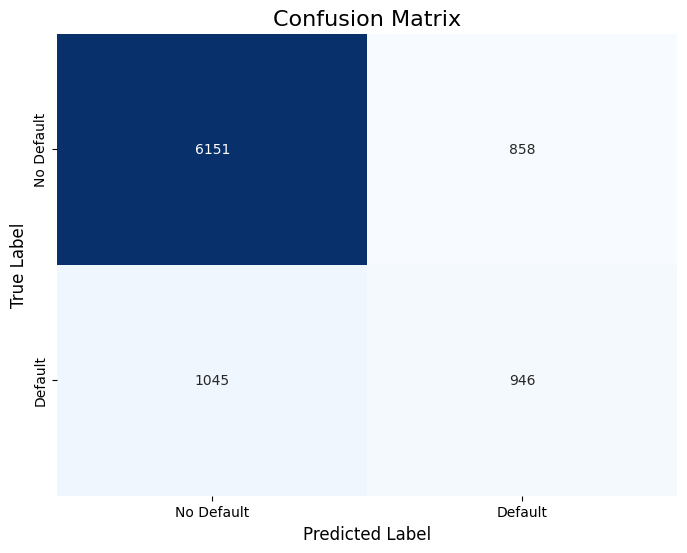

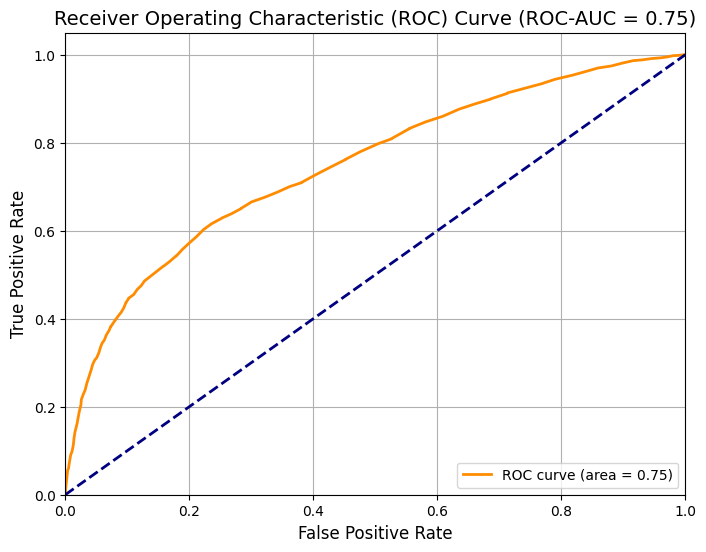

Model evaluation complete.


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluating model performance on the test set...")

# 1. Make predictions on the X_test dataset
y_pred = model.predict(X_test)

# 2. Predict probabilities for the positive class (class 1) on the X_test dataset
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class

# 3. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 4. Generate and display a confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# 5. Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title(f'Receiver Operating Characteristic (ROC) Curve (ROC-AUC = {roc_auc:.2f})', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Model evaluation complete.")

## Summarize ML Findings

### Subtask:
Summarize the machine learning model's performance, key evaluation metrics, and insights gained from the credit risk prediction task. Discuss the effectiveness of the chosen model and any potential next steps.


## Summary:

### Q&A
*   **What was the machine learning model's performance?**
    The RandomForestClassifier achieved an Accuracy of 0.7886, Precision of 0.5244, Recall of 0.4751, F1-Score of 0.4986, and an ROC-AUC Score of 0.7463 on the test set.

*   **What are the key evaluation metrics?**
    The key evaluation metrics used were Accuracy, Precision, Recall, F1-Score, and ROC-AUC Score. A confusion matrix and ROC curve were also visualized.

*   **What insights were gained from the credit risk prediction task?**
    The model demonstrates moderate predictive capability for credit default, with an ROC-AUC of 0.7463. While accuracy is relatively high, the F1-Score of 0.4986 and the balance between precision (0.5244) and recall (0.4751) indicate that there's room for improvement in correctly identifying defaulting clients without an excessive number of false positives.

*   **What is the effectiveness of the chosen model?**
    The RandomForestClassifier, combined with SMOTE for handling class imbalance, is a reasonable choice for this task. It shows a balanced performance between identifying true positives (recall) and minimizing false positives (precision) for the minority class, which is crucial in credit risk prediction.

*   **What are any potential next steps?**
    Potential next steps include further model tuning, exploring other advanced models, or investigating feature engineering.

### Data Analysis Key Findings
*   The dataset was successfully preprocessed by one-hot encoding categorical features ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'). The DataFrame's shape changed from `(30000, 24)` to `(30000, 83)` after encoding and dropping the original categorical columns.
*   The data was split into training (70%, 21,000 samples) and testing (30%, 9,000 samples) sets, stratified by the target variable.
*   Numerical features, including 'LIMIT\_BAL', 'AGE', 'BILL\_AMTX', and 'PAY\_AMTX' columns, were successfully scaled using `StandardScaler`.
*   Class imbalance in the training target variable `y_train` (16,355 instances of class 0, 4,645 instances of class 1) was addressed using SMOTE. This resulted in a balanced training set `y_train_resampled` with 16,355 instances for both class 0 and class 1, increasing the training data size from `(21000, 82)` to `(32710, 82)`.
*   A RandomForestClassifier was trained on the balanced training data and achieved an ROC-AUC score of 0.7463 on the test set.
*   The model demonstrated an F1-Score of 0.4986 on the test set, with a Precision of 0.5244 and Recall of 0.4751.

### Insights or Next Steps
*   The current model provides a solid baseline for credit default prediction, effectively balancing false positives and false negatives thanks to the combination of RandomForest and SMOTE.
*   Further hyperparameter tuning for the RandomForestClassifier, exploring alternative models (e.g., Gradient Boosting), or advanced feature engineering could potentially improve the model's F1-Score and ROC-AUC.
